# Project Milestone 3

## Activity 4: Regional Analysis Unveiling regional nuances in COVID-19 dynamics and identifying patterns in case distribution and fatality across time and continents.

Load the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the COVID-19 dataset
url = "https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0525-21Jul2025C+type@asset+block/owid-covid-data.csv"
df = pd.read_csv(url, parse_dates=['date'])

1. Create a grouped bar chart to visualize new cases by continent and month.

/tmp/ipython-input-1560177511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['month'] = df_cont['date'].dt.to_period('M')


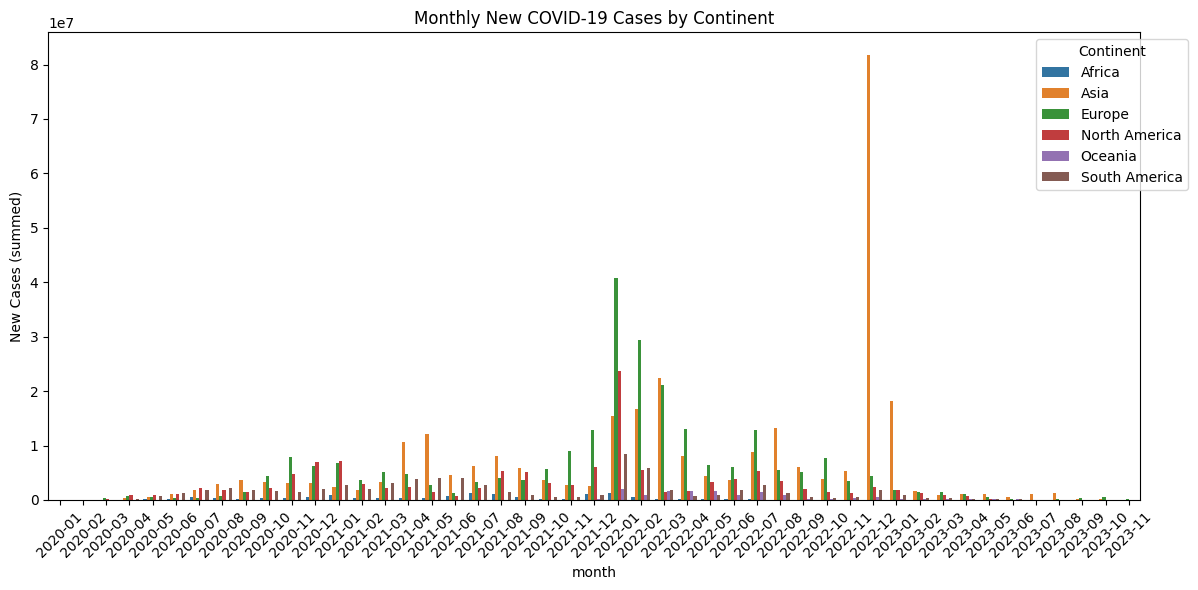

In [ ]:
df_cont = df.dropna(subset=['continent'])
df_cont['month'] = df_cont['date'].dt.to_period('M')
grouped = df_cont.groupby(['continent', 'month'])['new_cases'].sum().reset_index()
grouped['month'] = grouped['month'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='month', y='new_cases', hue='continent')
plt.xticks(rotation=45)
plt.ylabel('New Cases (summed)')
plt.title('Monthly New COVID‑19 Cases by Continent')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


2. Visualize the distribution of total COVID-19 cases by year using a box plot.

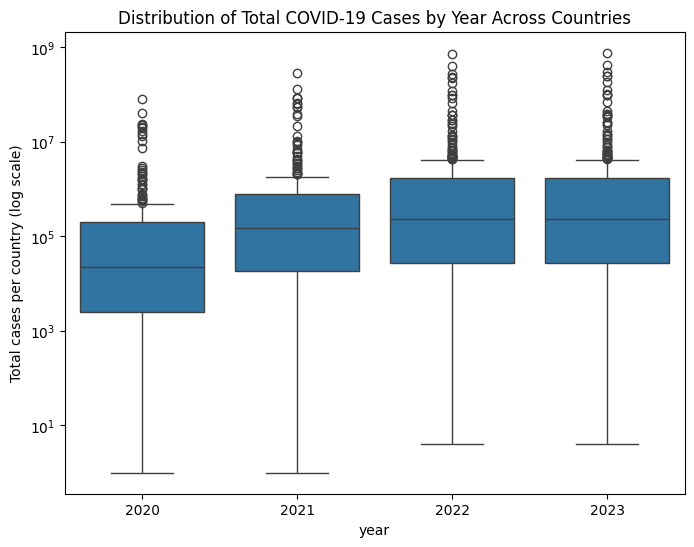

In [ ]:
df['year'] = df['date'].dt.year
annual = df.groupby(['year', 'iso_code'])['total_cases'].max().reset_index()

plt.figure(figsize=(8, 6))
sns.boxplot(data=annual, x='year', y='total_cases')
plt.yscale('log')
plt.ylabel('Total cases per country (log scale)')
plt.title('Distribution of Total COVID‑19 Cases by Year Across Countries')
plt.show()


3. Compare total deaths across different continents using a bar plot.

/tmp/ipython-input-1901492476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest, x='continent', y='total_deaths', palette='Set2')


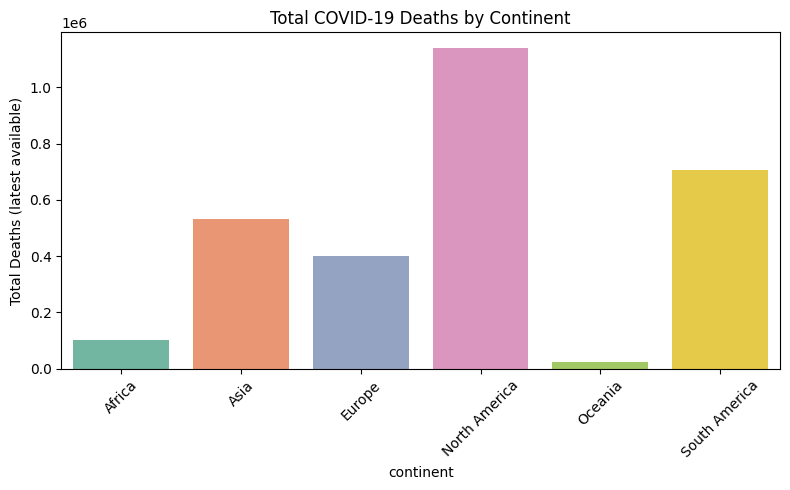

In [ ]:
latest = df_cont.groupby('continent')['total_deaths'].max().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=latest, x='continent', y='total_deaths', palette='Set2')
plt.ylabel('Total Deaths (latest available)')
plt.title('Total COVID‑19 Deaths by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Analyze the total cases on a month-by-month basis using a bar plot.

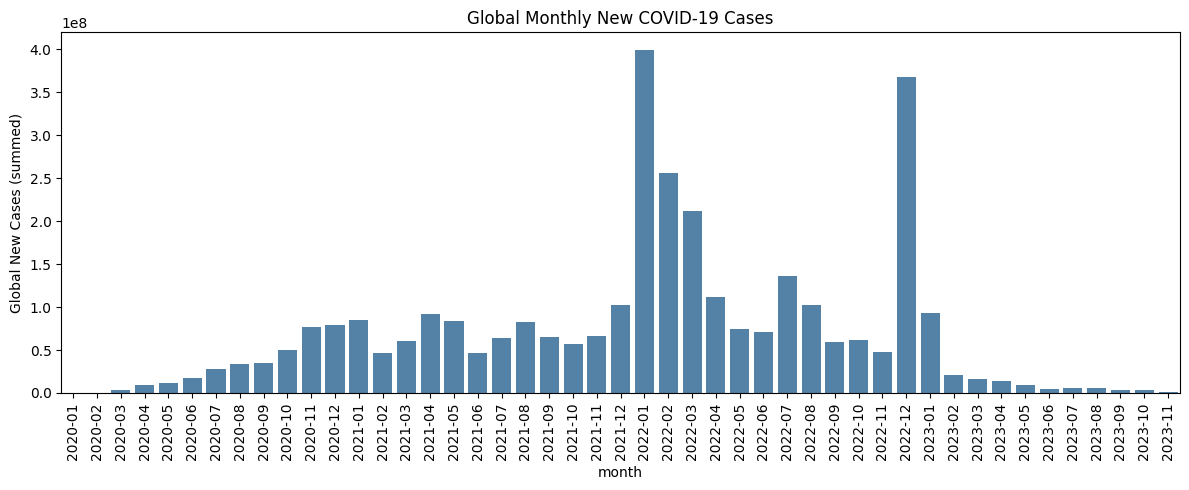

In [ ]:
monthly_global = df.groupby(df['date'].dt.to_period('M'))['new_cases'].sum().reset_index()
monthly_global['month'] = monthly_global['date'].astype(str)

plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_global, x='month', y='new_cases', color='steelblue')
plt.xticks(rotation=90)
plt.ylabel('Global New Cases (summed)')
plt.title('Global Monthly New COVID‑19 Cases')
plt.tight_layout()
plt.show()


## Activity 5: Time Series Analysis Capturing the daily dynamics of COVID-19, assessing the impact of vaccination, and monitoring testing metrics for a comprehensive global overview.

1. Explore the daily trend of new cases and new deaths globally using line plots.

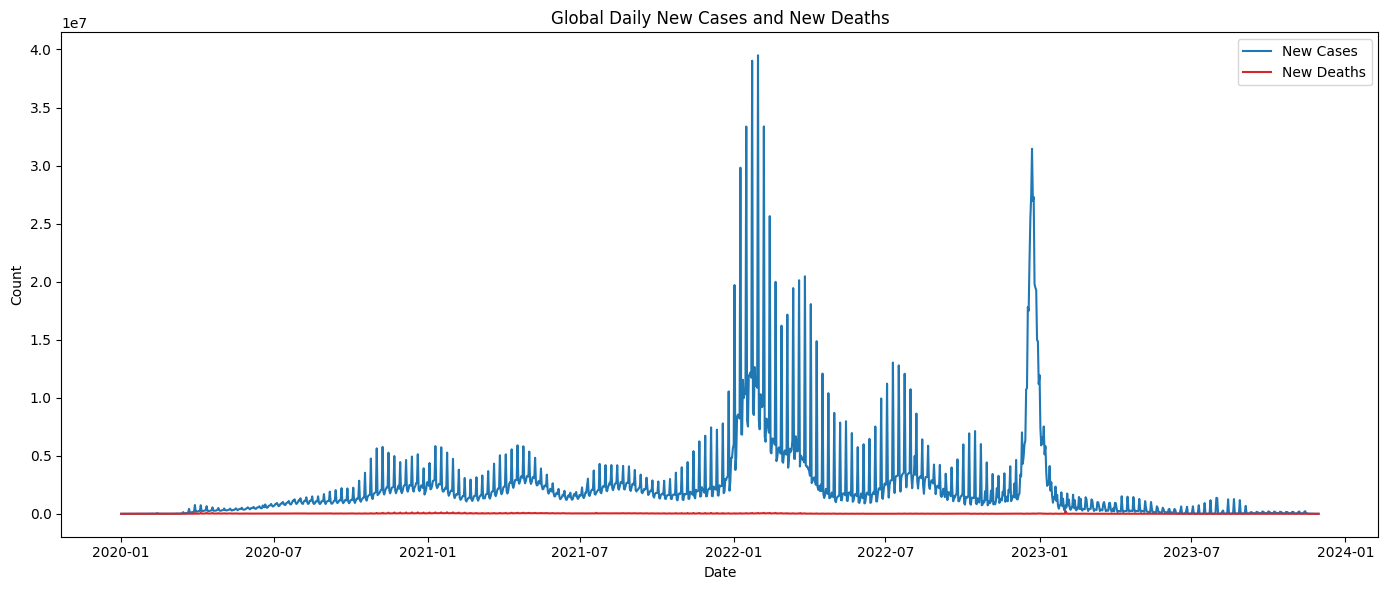

In [ ]:
global_daily = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(global_daily['date'], global_daily['new_cases'], label='New Cases', color='tab:blue')
plt.plot(global_daily['date'], global_daily['new_deaths'], label='New Deaths', color='tab:red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Daily New Cases and New Deaths')
plt.legend()
plt.tight_layout()
plt.show()

2. Calculate and visualize the daily average new cases and deaths globally.

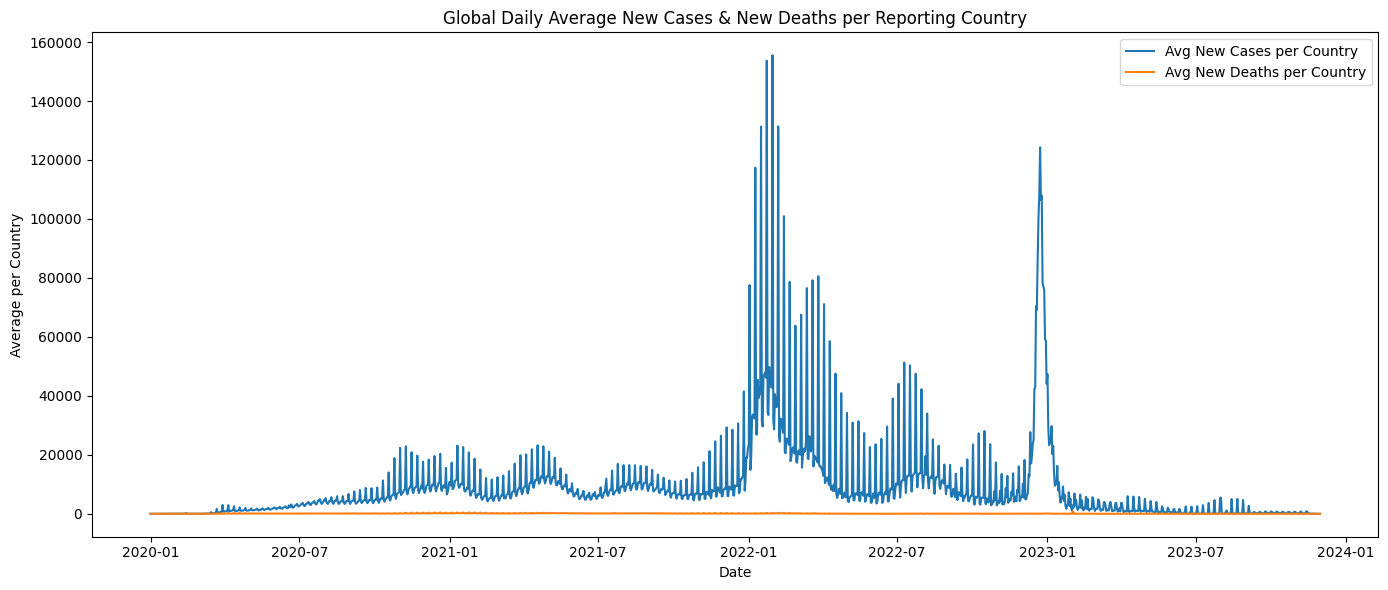

In [ ]:
# count number of countries reporting each day
reporting_counts = df.groupby('date')['iso_code'].count().reset_index().rename(columns={'iso_code':'n_countries'})
avg = global_daily.merge(reporting_counts, on='date')
avg['avg_cases_per_country'] = avg['new_cases'] / avg['n_countries']
avg['avg_deaths_per_country'] = avg['new_deaths'] / avg['n_countries']

plt.figure(figsize=(14, 6))
plt.plot(avg['date'], avg['avg_cases_per_country'], label='Avg New Cases per Country')
plt.plot(avg['date'], avg['avg_deaths_per_country'], label='Avg New Deaths per Country')
plt.xlabel('Date')
plt.ylabel('Average per Country')
plt.title('Global Daily Average New Cases & New Deaths per Reporting Country')
plt.legend()
plt.tight_layout()
plt.show()


3. Explore the trend of vaccination coverage over time globally.

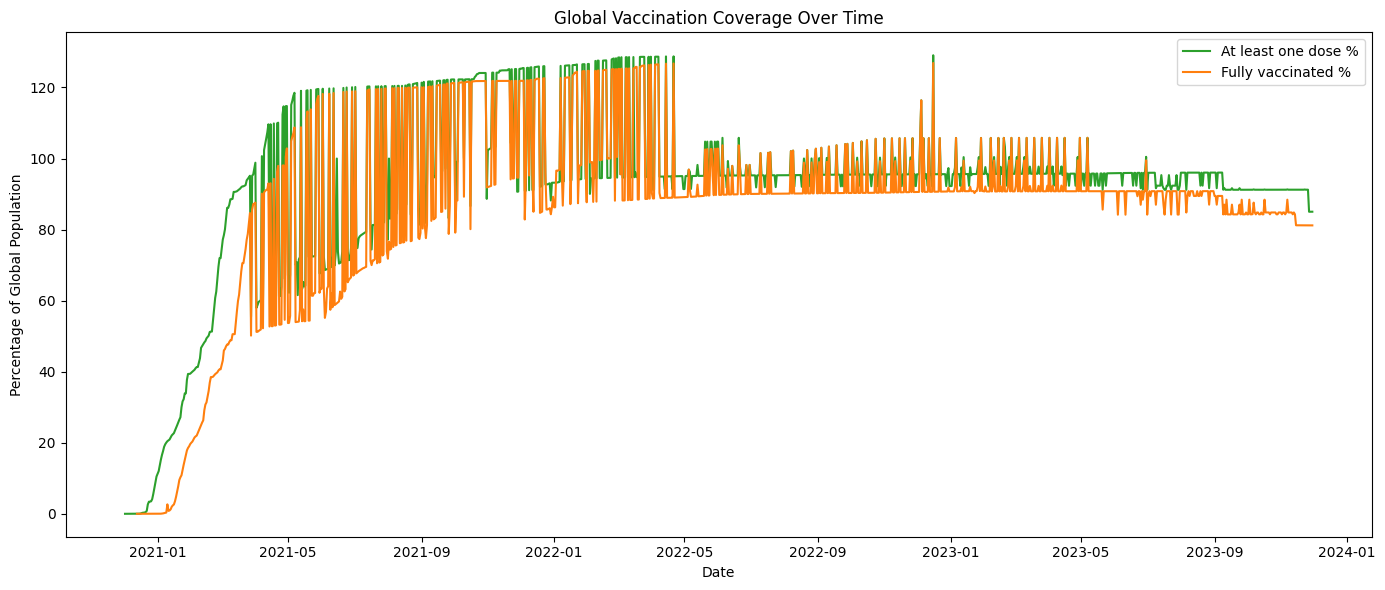

In [ ]:
global_vax = df.groupby('date').agg({
    'people_vaccinated': 'max',
    'people_fully_vaccinated': 'max',
    'people_vaccinated_per_hundred': 'max',
    'people_fully_vaccinated_per_hundred': 'max'
}).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(global_vax['date'], global_vax['people_vaccinated_per_hundred'], label='At least one dose %', color='tab:green')
plt.plot(global_vax['date'], global_vax['people_fully_vaccinated_per_hundred'], label='Fully vaccinated %', color='tab:orange')
plt.xlabel('Date')
plt.ylabel('Percentage of Global Population')
plt.title('Global Vaccination Coverage Over Time')
plt.legend()
plt.tight_layout()
plt.show()


4. Analyze the total tests and positive rate over time globally.

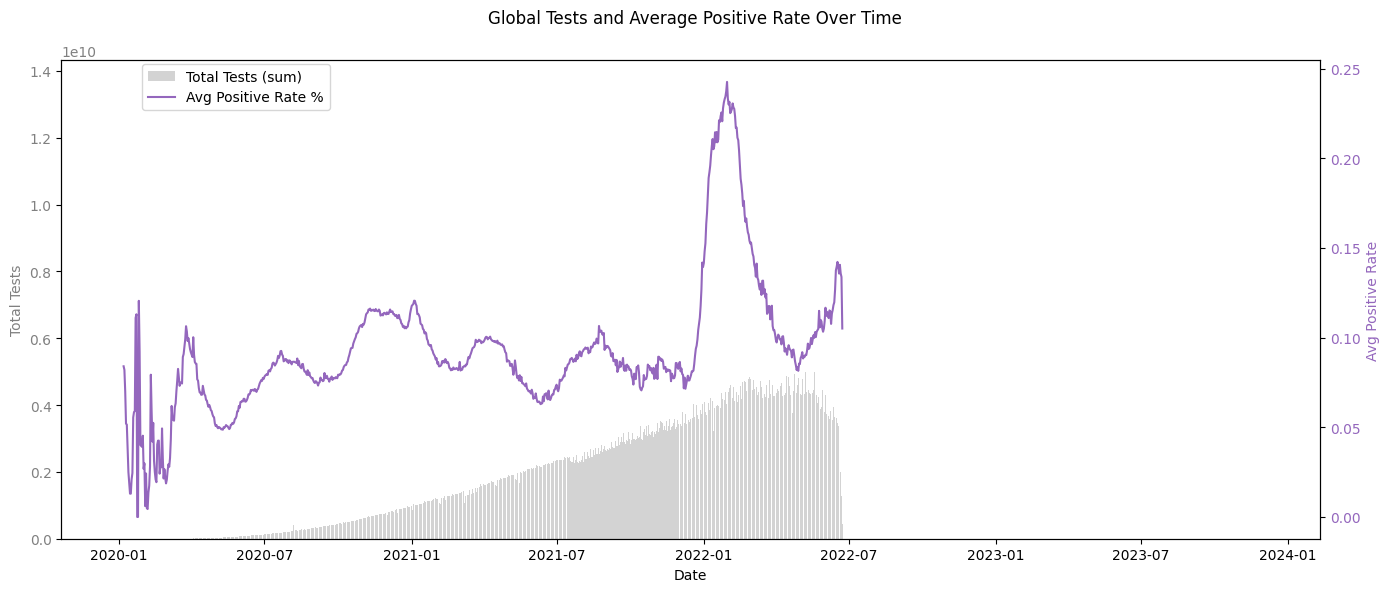

In [ ]:
global_tests = df.groupby('date').agg({
    'total_tests': 'sum',
    'positive_rate': 'mean'  # average across reporting countries
}).reset_index()

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.bar(global_tests['date'], global_tests['total_tests'], color='lightgray', label='Total Tests (sum)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Tests', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()
ax2.plot(global_tests['date'], global_tests['positive_rate'], color='tab:purple', label='Avg Positive Rate %')
ax2.set_ylabel('Avg Positive Rate', color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple')

fig.suptitle('Global Tests and Average Positive Rate Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


# Project Milestone-04

## Activity 6: In-Depth Country Analysis Conducting an in-depth examination of specific countries, understanding the correlation between cases and deaths globally, and exploring continental variations in case distribution.

1. Visualize the total COVID-19 cases and deaths over time for a specific country.

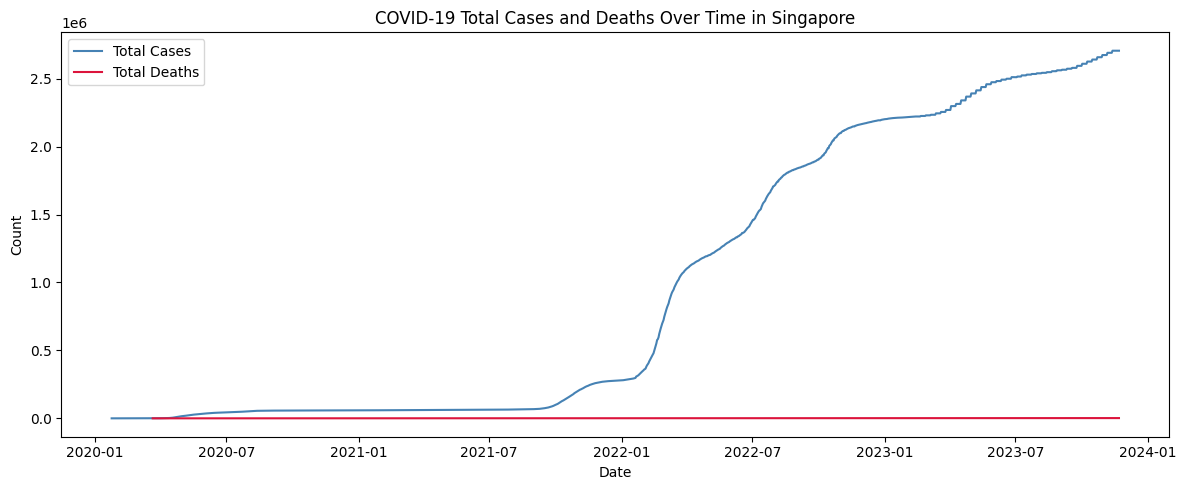

In [ ]:
country = 'Singapore'  # change this to any valid country
df_country = df[df['location'] == country]

plt.figure(figsize=(12, 5))
plt.plot(df_country['date'], df_country['total_cases'], label='Total Cases', color='steelblue')
plt.plot(df_country['date'], df_country['total_deaths'], label='Total Deaths', color='crimson')
plt.title(f"COVID-19 Total Cases and Deaths Over Time in {country}")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


2. Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user selected values.

In [ ]:
# Optionally use input() for CLI, or hardcode values here:
country_input = input("Enter country name: ")
metric_input = input("Enter metric (total_cases or total_deaths): ")

df_selected = df[df['location'] == country_input]

plt.figure(figsize=(10, 5))
plt.plot(df_selected['date'], df_selected[metric_input], color='darkorange')
plt.title(f"{metric_input.replace('_', ' ').title()} Over Time in {country_input}")
plt.xlabel("Date")
plt.ylabel(metric_input.replace('_', ' ').title())
plt.tight_layout()
plt.show()


Enter country name: india
Enter metric (total_cases or total_deaths): 1


KeyError: '1'

<Figure size 1000x500 with 0 Axes>

3. Analyze the distribution of total cases across different continents using a box plot.

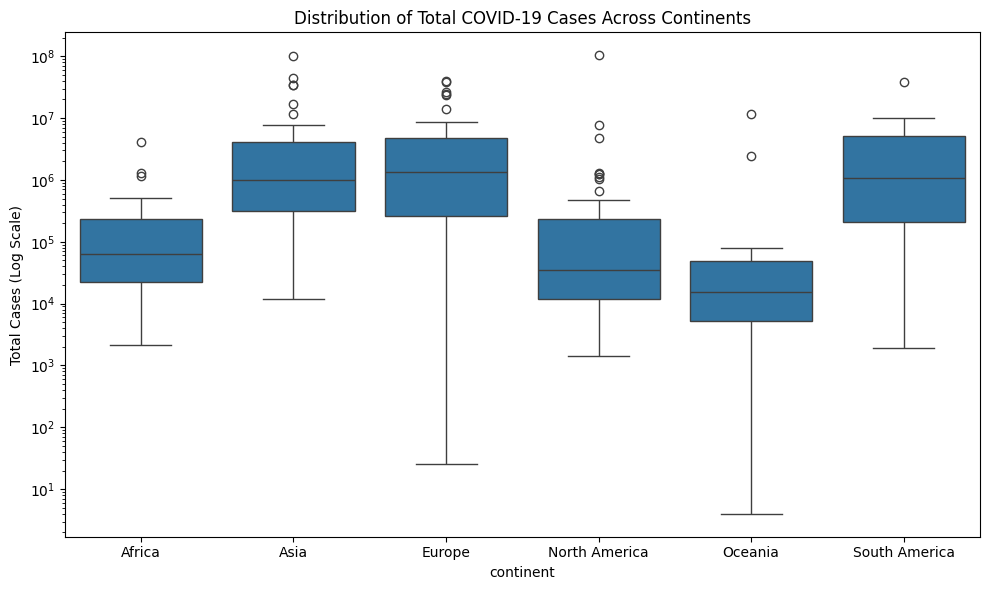

In [ ]:
df_cont = df.dropna(subset=['continent'])
latest = df_cont.groupby(['continent', 'location'])['total_cases'].max().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(data=latest, x='continent', y='total_cases')
plt.yscale('log')
plt.ylabel('Total Cases (Log Scale)')
plt.title('Distribution of Total COVID-19 Cases Across Continents')
plt.tight_layout()
plt.show()


4. Visualize the Year wise monthly trend of new COVID-19 cases for user selected country.

Enter country name for trend analysis: Singapore


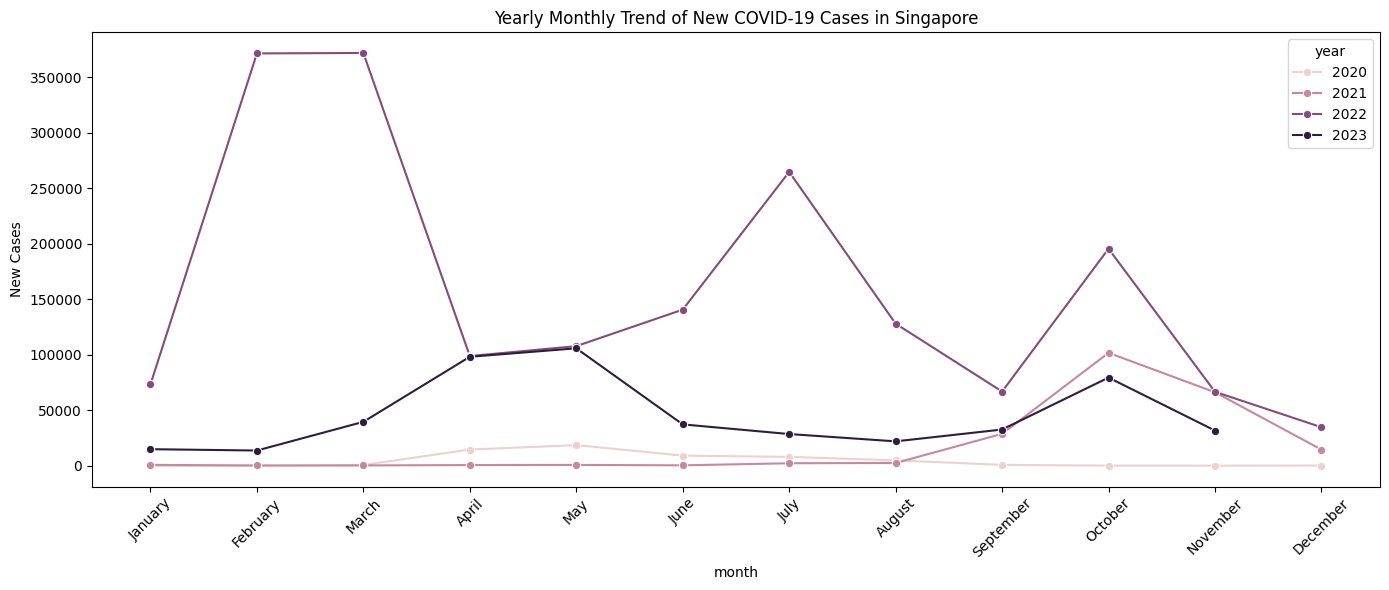

In [ ]:
country = input("Enter country name for trend analysis: ")
df_country = df[df['location'] == country].copy()
df_country['year'] = df_country['date'].dt.year
df_country['month'] = df_country['date'].dt.month_name()

monthly_trend = df_country.groupby(['year', 'month'])['new_cases'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend.sort_values(['year', 'month'], inplace=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='month', y='new_cases', hue='year', marker="o")
plt.title(f"Yearly Monthly Trend of New COVID-19 Cases in {country}")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Activity 7: Additional Insights Extracting additional insights, examining the influence of external factors, and evaluating regional disparities for a holistic understanding of the COVID-19 landscape.

1. Visualize the fatality rate (total deaths / total cases) over time globally.

In [ ]:
global_daily = df.groupby('date')[['total_deaths', 'total_cases']].sum().reset_index()
global_daily['fatality_rate'] = global_daily['total_deaths'] / global_daily['total_cases']

plt.figure(figsize=(12, 5))
plt.plot(global_daily['date'], global_daily['fatality_rate'], color='darkred')
plt.title("Global COVID-19 Fatality Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Fatality Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


2. Explore positivity rate (total_cases/ total tests) verses total tests conducted to analyse testing effectiveness use x axis as logarithmic scale for better visualization.

In [ ]:
latest = df[df['date'] == df['date'].max()].copy()
latest = latest[(latest['total_tests'] > 0) & (latest['total_cases'] > 0)]
latest['positivity_rate'] = latest['total_cases'] / latest['total_tests']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest, x='total_tests', y='positivity_rate', hue='continent', alpha=0.7)
plt.xscale('log')
plt.title("Positivity Rate vs Total Tests (Log Scale)")
plt.xlabel("Total Tests (log scale)")
plt.ylabel("Positivity Rate")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


3. Analyze fatality rate and its relationship with smoking (Use male_smokers and female_smokers columns)

In [ ]:
# Get the latest fatality rate per country
latest = df.sort_values('date').groupby('location').tail(1)
latest = latest[['location', 'total_deaths', 'total_cases', 'male_smokers', 'female_smokers']].dropna()
latest['fatality_rate'] = latest['total_deaths'] / latest['total_cases']

plt.figure(figsize=(12, 5))
sns.scatterplot(data=latest, x='male_smokers', y='fatality_rate', label='Male Smokers', color='blue')
sns.scatterplot(data=latest, x='female_smokers', y='fatality_rate', label='Female Smokers', color='orange')
plt.xlabel("Smoking Rate (%)")
plt.ylabel("Fatality Rate")
plt.title("Fatality Rate vs Smoking Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4. Create a heatmap to analyze the relationship between hospital beds per thousand and fatality rate.

In [ ]:
heat_df = df.sort_values('date').groupby('location').tail(1)
heat_df = heat_df[['location', 'hospital_beds_per_thousand', 'total_cases', 'total_deaths']].dropna()
heat_df['fatality_rate'] = heat_df['total_deaths'] / heat_df['total_cases']

# Correlation matrix
corr = heat_df[['hospital_beds_per_thousand', 'fatality_rate']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation: Hospital Beds vs Fatality Rate")
plt.tight_layout()
plt.show()
